# Import

In [80]:
# Basic
import pandas as pd
import numpy as np

# Data
from catboost import datasets

# Model
from robusta.testing import get_estimator

# Crossval
from sklearn.model_selection import RepeatedStratifiedKFold
from robusta.crossval import *

# Plot
from jupyterthemes import jtplot
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

jtplot.style('gruvboxd')
matplotlib.use('nbagg')

# Data

In [7]:
X_train, X_test = datasets.amazon()

y_train = X_train['ACTION']
X_train.drop(columns='ACTION', inplace=True)

X_train.index.name = 'id'
X_test.set_index('id', inplace=True)

X_train

,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
id,,,,,,,,,
0,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,36135,5396,117961,118343,119993,118321,240983,290919,118322
4,42680,5905,117929,117930,119569,119323,123932,19793,119325
...,...,...,...,...,...,...,...,...,...
32764,23497,16971,117961,118300,119993,118321,240983,290919,118322
32765,25139,311198,91261,118026,122392,121143,173805,249618,121145
32766,34924,28805,117961,118327,120299,124922,152038,118612,124924


# Task

In [18]:
cv = RepeatedStratifiedKFold(3, 10)
scoring = 'roc_auc'

# Cross-Validation

In [140]:
modelA

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=3,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=0.1, subsample_for_bin=200000, subsample_freq=0)

In [154]:
modelA = get_estimator('LGB', 'classifier', max_depth=3, colsample_bytree=0.3)

resultA = crossval(modelA, cv, X_train, y_train, X_new=X_test, scoring=scoring, 
                   method='predict_proba', train_score=True, verbose=2)

[18:24:24]  LGBMClassifier

[18:24:24]  TRN 1:   0.7999    VAL 1:   0.7473
[18:24:24]  TRN 2:   0.7989    VAL 2:   0.7468
[18:24:25]  TRN 3:   0.8080    VAL 3:   0.7311
[18:24:25]  TRN 4:   0.7999    VAL 4:   0.7489
[18:24:25]  TRN 5:   0.7930    VAL 5:   0.7613
[18:24:25]  TRN 6:   0.8009    VAL 6:   0.7386
[18:24:26]  TRN 7:   0.7943    VAL 7:   0.7465
[18:24:26]  TRN 8:   0.8012    VAL 8:   0.7503
[18:24:26]  TRN 9:   0.7994    VAL 9:   0.7358
[18:24:27]  TRN 10:   0.8062    VAL 10:   0.7474
[18:24:27]  TRN 11:   0.8002    VAL 11:   0.7580
[18:24:27]  TRN 12:   0.7987    VAL 12:   0.7531
[18:24:27]  TRN 13:   0.8016    VAL 13:   0.7314
[18:24:28]  TRN 14:   0.7962    VAL 14:   0.7653
[18:24:28]  TRN 15:   0.8014    VAL 15:   0.7508
[18:24:28]  TRN 16:   0.8023    VAL 16:   0.7409
[18:24:28]  TRN 17:   0.7938    VAL 17:   0.7299
[18:24:29]  TRN 18:   0.8001    VAL 18:   0.7539
[18:24:29]  TRN 19:   0.7997    VAL 19:   0.7611
[18:24:29]  TRN 20:   0.8085    VAL 20:   0.7301
[18:24:30]

In [173]:
modelB = get_estimator('LGB', 'classifier', max_depth=3, colsample_bytree=0.4)

resultB = crossval(modelB, cv, X_train, y_train, X_new=X_test, scoring=scoring, 
                   method='predict_proba', train_score=True, verbose=2)

[18:36:35]  LGBMClassifier

[18:36:35]  TRN 1:   0.8095    VAL 1:   0.7527
[18:36:36]  TRN 2:   0.8013    VAL 2:   0.7515
[18:36:36]  TRN 3:   0.8160    VAL 3:   0.7313
[18:36:36]  TRN 4:   0.8101    VAL 4:   0.7555
[18:36:37]  TRN 5:   0.8034    VAL 5:   0.7620
[18:36:37]  TRN 6:   0.8079    VAL 6:   0.7438
[18:36:37]  TRN 7:   0.8069    VAL 7:   0.7470
[18:36:37]  TRN 8:   0.8108    VAL 8:   0.7477
[18:36:38]  TRN 9:   0.8069    VAL 9:   0.7435
[18:36:38]  TRN 10:   0.8101    VAL 10:   0.7516
[18:36:38]  TRN 11:   0.8014    VAL 11:   0.7576
[18:36:38]  TRN 12:   0.8075    VAL 12:   0.7537
[18:36:39]  TRN 13:   0.8122    VAL 13:   0.7348
[18:36:39]  TRN 14:   0.8011    VAL 14:   0.7634
[18:36:39]  TRN 15:   0.8101    VAL 15:   0.7489
[18:36:40]  TRN 16:   0.8081    VAL 16:   0.7371
[18:36:40]  TRN 17:   0.8010    VAL 17:   0.7376
[18:36:40]  TRN 18:   0.8060    VAL 18:   0.7618
[18:36:40]  TRN 19:   0.8017    VAL 19:   0.7562
[18:36:41]  TRN 20:   0.8136    VAL 20:   0.7300
[18:36:41]

# Compare

In [205]:
from scipy.stats import ttest_rel, ttest_ind, norm

def compare_ttest(resultA, resultB, key='val_score', ind=True):
    
    # Check input
    assert key in resultA, f"<resultA> has no '{key}'"
    assert key in resultB, f"<resultB> has no '{key}'"
    a = resultA[key]
    b = resultB[key]
    
    # t-test
    t, p = ttest_rel(a, b)
    
    # Plot
    _, axes = plt.subplots(2, 2)
    
    # Plot box
    ax = axes[0, 0]
    sns.boxplot(['A', 'B'], [a, b], linewidth=2.0, ax=ax)
    ax.grid(alpha=0.2)
    
    # Plot pairs
    ax = axes[1, 0]
    for x, y in zip(a, b):
        ax.plot(['A', 'B'], [x, y], 'o-', color='b', alpha=0.8)
    ax.plot(['A', 'B'], [np.mean(a), np.mean(b)], 'o-', color='w')
    ax.grid(alpha=0.2)
    
    # Plot dist
    ax = axes[0, 1]
    sns.distplot(a, 10, label='A', ax=ax)
    sns.distplot(b, 10, label='B', ax=ax)
    ax.grid(alpha=0.2)
    ax.legend()
    
    # Plot proba
    ax = axes[1, 1]
    
    xx = np.arange(-abs(t), abs(t), 0.001)
    yy = norm.pdf(xx, 0, 1)
    ax.plot(xx, yy, color='gray')
    ax.fill_between(xx, yy, color='gray', alpha=0.2)
    
    xx = np.arange(-5, t, 0.001)
    yy = norm.pdf(xx, 0, 1)
    ax.plot(xx, yy, color='r')
    ax.fill_between(xx, yy, color='r', alpha=0.2)
    
    xx = np.arange(abs(t), 5, 0.001)
    yy = norm.pdf(xx, 0, 1)
    ax.plot(xx, yy, color='r')
    ax.fill_between(xx, yy, color='r', alpha=0.2)
    
    ax.legend(['t-value = {:.4f}'.format(t), 
               'p-value = {:.4f}'.format(p)])
    ax.grid(alpha=0.2)
    
    return t, p

<IPython.core.display.Javascript object>


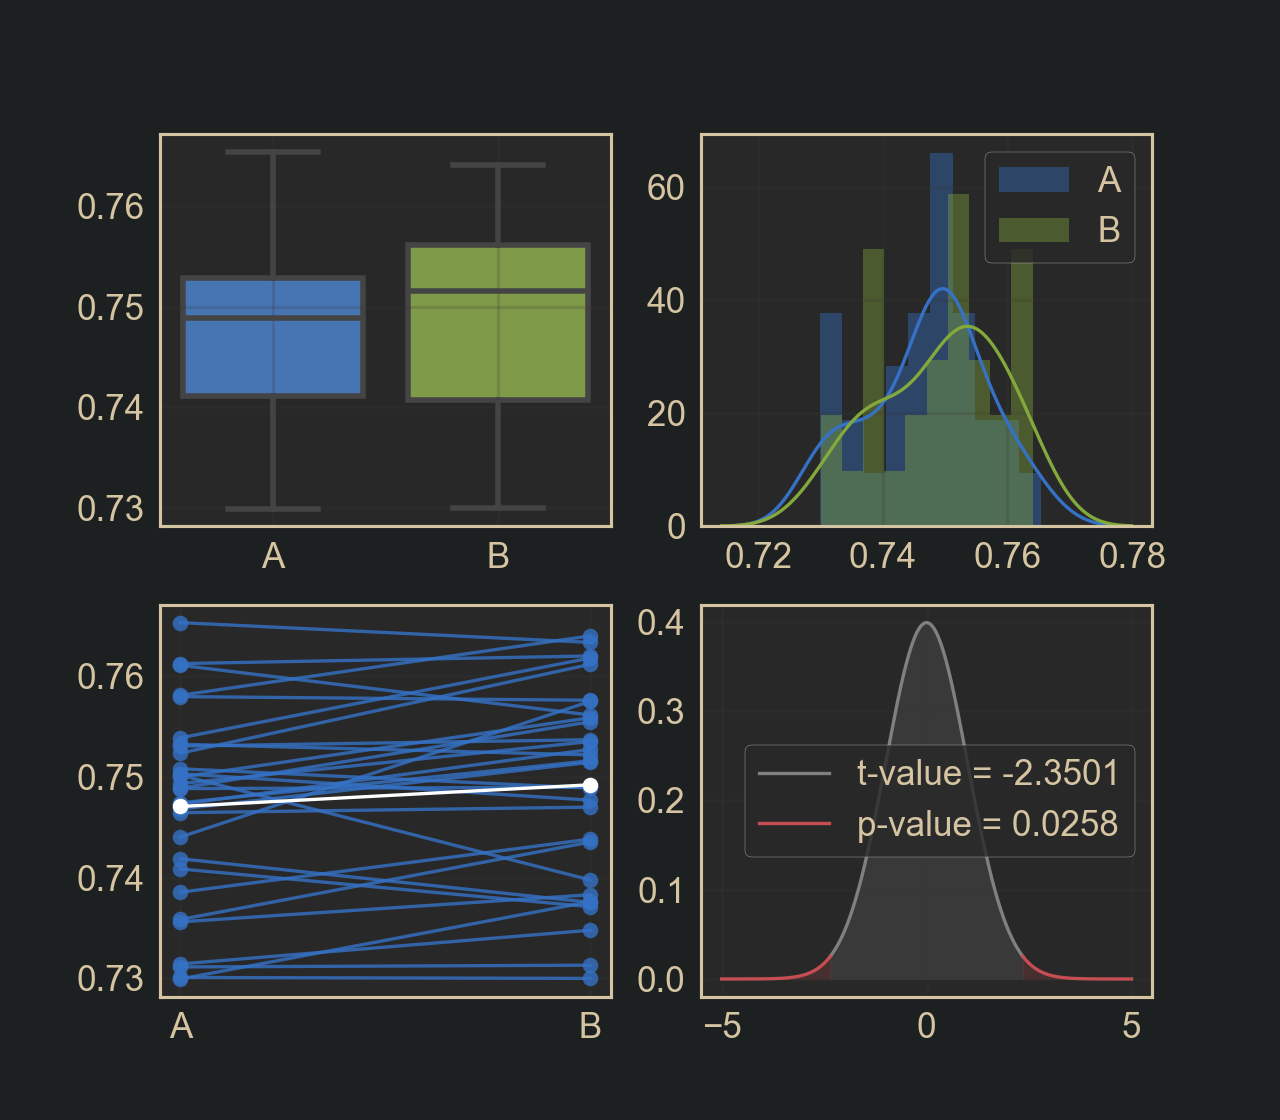

(-2.350077766128589, 0.025785860525853143)

In [206]:
%matplotlib notebook

compare_ttest(resultA, resultB)

In [169]:
from scipy.stats import ttest_rel, ttest_ind

key='val_score'

t, p = ttest_ind(resultA[key], resultB[key])
t, p

(-2.2910779389000777, 0.02561053262036811)

In [55]:
ttest_ind(resultA[key], resultB[key])

Ttest_indResult(statistic=-10.196459423335167, pvalue=1.5019273805946714e-14)